<a href="https://colab.research.google.com/github/bksat90/ImageSegmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of KerasCV.
!pip install -q --upgrade keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.9 MB/s eta 0:00:00


In [2]:
# import libraries
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import keras
import keras_cv

from keras import layers
from keras_cv import bounding_box
from keras_cv import visualization
from random import shuffle
from PIL import Image
from pycocotools.coco import COCO
from pycocotools.coco import COCO

%matplotlib inline

Using TensorFlow backend


In [3]:
# Import and mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# # Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/RMiDS/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/RMiDS/coco2017/"

In [5]:
# Define location of training data (images and labels).
train_data_path = "/content/drive/MyDrive/RMiDS/coco2017/train-300"
train_annotation_file = f"{train_data_path}/labels.json"

In [6]:
# Initialising COCO API for instance annotations
coco = COCO(train_annotation_file)

loading annotations into memory...
Done (t=1.59s)
creating index...
index created!


In [12]:
# Extract and display COCO categories and supercategories for the training dataset.

category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  63
[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}]
[{'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}]
[{'id': 2, 'name': 'banana', 'supercategory': 'food'}]
[{'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}]
[{'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}]
[{'id': 5, 'name': 'bear', 'supercategory': 'animal'}]
[{'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}]
[{'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}]
[{'id': 8, 'name': 'bird', 'supercategory': 'animal'}]
[{'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}]
[{'id': 10, 'name': 'book', 'supercategory': 'indoor'}]
[{'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}]
[{'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}]
[{'id': 13, 'name': 'broccoli', 'supercategory': 'food'}]
[{'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}]
[{'id': 15, 'name': 'cake', 'supercategory': 'food'}]
[{'id': 16, 'name': 'car', 'supercategory': 've

In [8]:
# Define function to extract category name from ID.

def get_category_name(class_ID, categories):
    for i in range(len(categories)):
        if categories[i]["id"] == class_ID:
            return categories[i]["name"]
    return "None"

In [9]:
# print one category

category_name_10 = get_category_name(10, categories)
print(f"The category name is {category_name_10}.")

The category name is book.


In [10]:
# print another category

category_name_8 = get_category_name(8, categories)
print(f"The category name is {category_name_8}.")

The category name is bird.


In [11]:
# Get all training images containing a given object category or categories.
# Remember, for this assignment we will focus on the classes "person", "cake", "dog", "cat"!

filter_class = ["cat"]
category_IDs = coco.getCatIds(catNms=filter_class)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")

Number of images containing specified category(ies): 4.
IDs of images containing specified category(ies): [299, 132, 268, 294].


In [ ]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.

test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[1878]
[{'id': 1878, 'image_id': 132, 'category_id': 18, 'bbox': [164.75, 387.63, 80.76, 103.53], 'segmentation': [[198.0, 490.5, 188.0, 489.5, 173.5, 482.0, 170.5, 466.0, 163.5, 453.0, 168.5, 437.0, 189.5, 400.0, 227.0, 386.5, 235.5, 390.0, 244.5, 411.0, 243.5, 424.0, 229.5, 442.0, 235.5, 460.0, 243.5, 471.0, 238.0, 478.5, 230.0, 476.5, 220.0, 449.5, 213.5, 465.0, 217.5, 481.0, 205.0, 489.5, 198.0, 490.5]], 'area': 8361.0828, 'iscrowd': 0, 'supercategory': 'animal'}]


In [17]:
# Load images for the specific id
image_ids = coco.getImgIds()
image_id = image_ids[1]  # Change this line to display a different image
image_info = coco.loadImgs(image_id)
print(image_info)

[{'id': 2, 'file_name': '000000000260.jpg', 'height': 333, 'width': 500, 'license': None, 'coco_url': None}]


{'id': 2, 'file_name': '000000000260.jpg', 'height': 333, 'width': 500, 'license': None, 'coco_url': None}


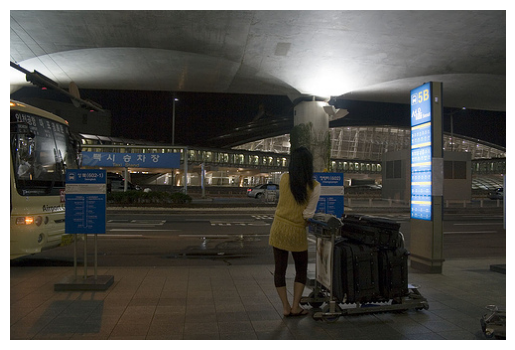

In [18]:
# Load and display one of the example images.
example_image = coco.loadImgs(image_id)[0]
print(example_image)

image = io.imread(f'{train_data_path}/data/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [20]:
# Load annotations for the given ids
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'id': 24, 'image_id': 2, 'category_id': 14, 'bbox': [2.26, 93.77, 66.14, 157.86], 'segmentation': [[7.0, 249.5, 3.5, 243.0, 2.0, 92.5, 55.0, 106.5, 67.5, 142.0, 67.5, 156.0, 53.5, 161.0, 51.5, 186.0, 54.5, 195.0, 55.5, 233.0, 7.0, 249.5]], 'area': 10440.860400000001, 'iscrowd': 0, 'supercategory': 'vehicle'}, {'id': 25, 'image_id': 2, 'category_id': 41, 'bbox': [261.0, 139.88, 51.75, 169.5], 'segmentation': [[280.0, 308.5, 275.5, 307.0, 266.5, 277.0, 265.5, 241.0, 260.5, 232.0, 272.5, 168.0, 282.5, 160.0, 289.0, 138.5, 303.5, 150.0, 304.5, 170.0, 311.5, 179.0, 307.5, 196.0, 297.5, 213.0, 303.5, 242.0, 300.5, 267.0, 294.5, 279.0, 291.5, 295.0, 294.0, 305.5, 286.5, 305.0, 288.5, 265.0, 283.0, 246.5, 276.5, 264.0, 284.5, 301.0, 280.0, 308.5]], 'area': 8771.625, 'iscrowd': 0, 'supercategory': 'person'}, {'id': 26, 'image_id': 2, 'category_id': 41, 'bbox': [17.29, 142.16, 23.67, 27.850000000000005], 'segmentation': [[25.0, 169.5, 16.5, 164.0, 20.5, 156.0, 19.5, 148.0, 26.0, 141.5, 29.5, 1

In [21]:
# Extract the training images that contain any combination of the four target classes.

target_classes = ["cake", "cat", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(
    f"Number of images with target classes including repetitions: {len(training_images)}."
)

cake
cat
dog
person
Number of images with target classes including repetitions: 287.


In [22]:
# category ids for target class
filterClasses = ["cake", "cat", "dog", "person"]
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[15, 18, 25, 41]


In [24]:
# print information for the category id
catID = 15
print(coco.loadCats(ids=catID))

imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'id': 15, 'name': 'cake', 'supercategory': 'food'}]
240


In [26]:
# annotation ids for image 'cake'
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272]


Annotations for Image ID 240:
000000016254.jpg


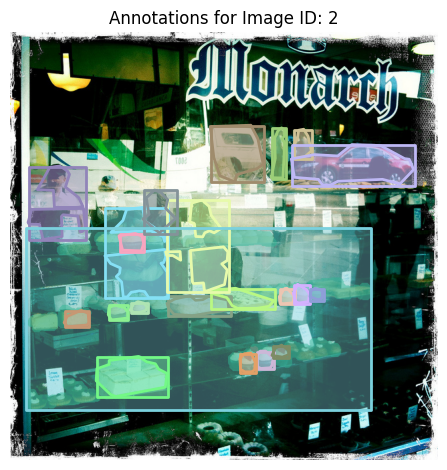

In [30]:
print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(train_data_path + '/data/' + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(imgId))
plt.tight_layout()
plt.show()